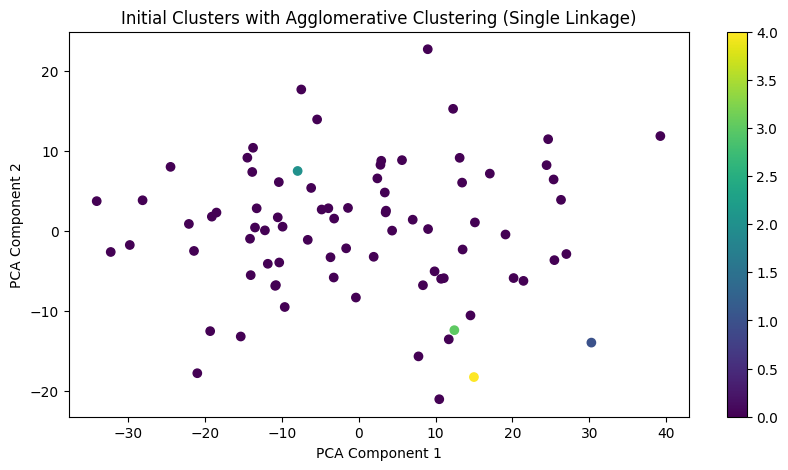


Final Error Rate (MSE Approximation): 719.128116185472


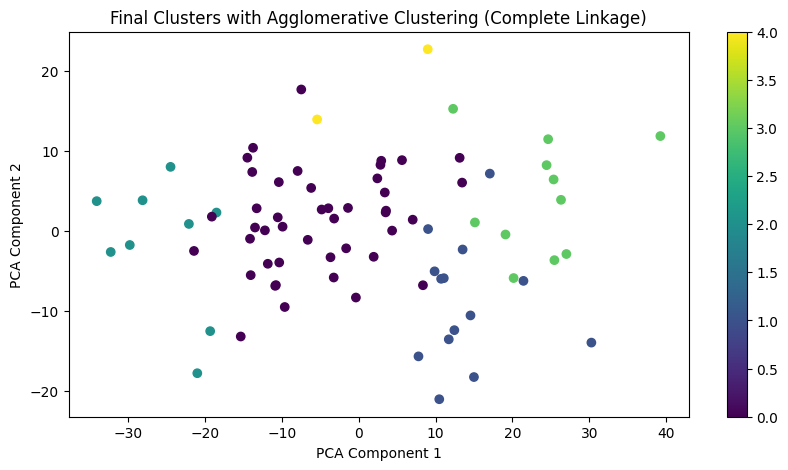

In [4]:
import os
import cv2
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist

# Load images from the directory
dataset_folder = '/kaggle/input/image-dataset-for-unsupervised-clustering/photos_no_class'
image_files = [f for f in os.listdir(dataset_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Initialize an empty list to store feature vectors
feature_vectors = []
# Define image size for resizing (uniform shape)
image_size = (64, 64)

# Load and preprocess each image
for image_file in image_files:
    img_path = os.path.join(dataset_folder, image_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, image_size)  # Resize image to fixed size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Flatten the image and normalize
    img_flattened = img.flatten() / 255.0  # Normalize to 0-1 range
    feature_vectors.append(img_flattened)

# Convert list of feature vectors to numpy array
feature_vectors = np.array(feature_vectors)

# Number of clusters
num_clusters = 5

# Step 1: Initial Clustering with single linkage method
initial_agglo = AgglomerativeClustering(n_clusters=num_clusters, linkage='single')
initial_labels = initial_agglo.fit_predict(feature_vectors)

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_vectors)

# Plot Initial Clusters
plt.figure(figsize=(10, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=initial_labels, cmap='viridis', marker='o')
plt.title("Initial Clusters with Agglomerative Clustering (Single Linkage)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

# Step 2: Final Clustering with complete linkage method
final_agglo = AgglomerativeClustering(n_clusters=num_clusters, linkage='complete')
final_labels = final_agglo.fit_predict(feature_vectors)

# Calculate "error rate" (Mean Squared Error approximation)
# To approximate MSE, compute the mean distance of each point to its cluster's centroid
centroids = np.array([feature_vectors[final_labels == i].mean(axis=0) for i in range(num_clusters)])
mse_approx = np.mean([np.linalg.norm(feature_vectors[i] - centroids[final_labels[i]]) ** 2 for i in range(len(feature_vectors))])

# Display final clustering results
print(f"\nFinal Error Rate (MSE Approximation): {mse_approx}")

# Plot Final Clusters
plt.figure(figsize=(10, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=final_labels, cmap='viridis', marker='o')
plt.title("Final Clusters with Agglomerative Clustering (Complete Linkage)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()
